In [ ]:
# exemplo 01 - Árvores de descisão 

In [2]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
uploaded = files.upload()

Saving shows.csv to shows.csv


In [ ]:
comediantes = pd.read_csv('shows.csv' ,sep=',')
comediantes.head(13)


,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


In [ ]:
comediantes['Nationality'] = comediantes['Nationality'].map({'UK':0, 'USA':1, 'N':2})
comediantes['Go'] = comediantes['Go'].map({'NO':1, 'YES':2})
comediantes.head()

,Age,Experience,Rank,Nationality,Go
0,36,10,9,0,1
1,42,12,4,1,1
2,23,4,6,2,1
3,52,4,4,1,1
4,43,21,8,1,2


In [ ]:
atributos_nomes = ['Age', 'Experience', 'Rank', 'Nationality']
atributos = comediantes[atributos_nomes]
classes = comediantes['Go']

In [ ]:
arvore = DecisionTreeClassifier()
arvore = arvore.fit(atributos.values,classes.values)

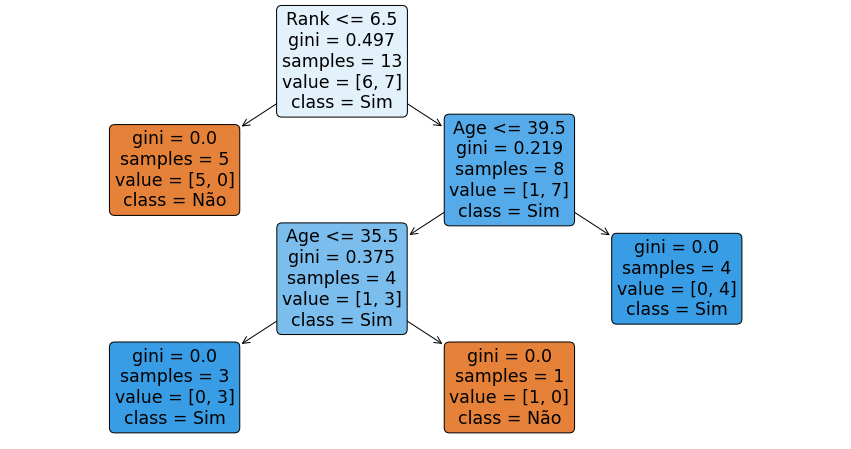

In [ ]:
plt.figure(figsize=(15,8))
plot_tree(arvore, filled=True, rounded=True, class_names=['Não','Sim'], feature_names=atributos_nomes)
plt.show()

In [ ]:
arvore.predict([[40,10,7,1]])

array([2])

In [ ]:
arvore.predict([[80,30,4,0]])

array([1])

In [ ]:
# exemplo 02  

In [3]:
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [4]:
vinhos = pd.read_csv('winequality-red.csv', sep=';')
vinhos.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
vinhos['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [5]:
vinhos_colunas = vinhos.columns[0:11].values.tolist()
vinhos_atributos = vinhos[vinhos_colunas]
vinhos_classes = vinhos['quality']

In [7]:
atributos_treino, atributos_teste, vinho_classes_treino, vinho_classes_teste = train_test_split(vinhos_atributos, vinhos_classes, test_size=0.1, random_state=10)

In [9]:
vinheira = DecisionTreeClassifier()
vinheira = vinheira.fit(atributos_treino,vinho_classes_treino)

In [11]:
vinhos_classes_predicao = vinheira.predict(atributos_teste)
acuracia = accuracy_score(vinho_classes_teste,vinhos_classes_predicao)

In [12]:
print('Acurácia de calssificação: {}'.format(acuracia))

Acurácia de calssificação: 0.61875


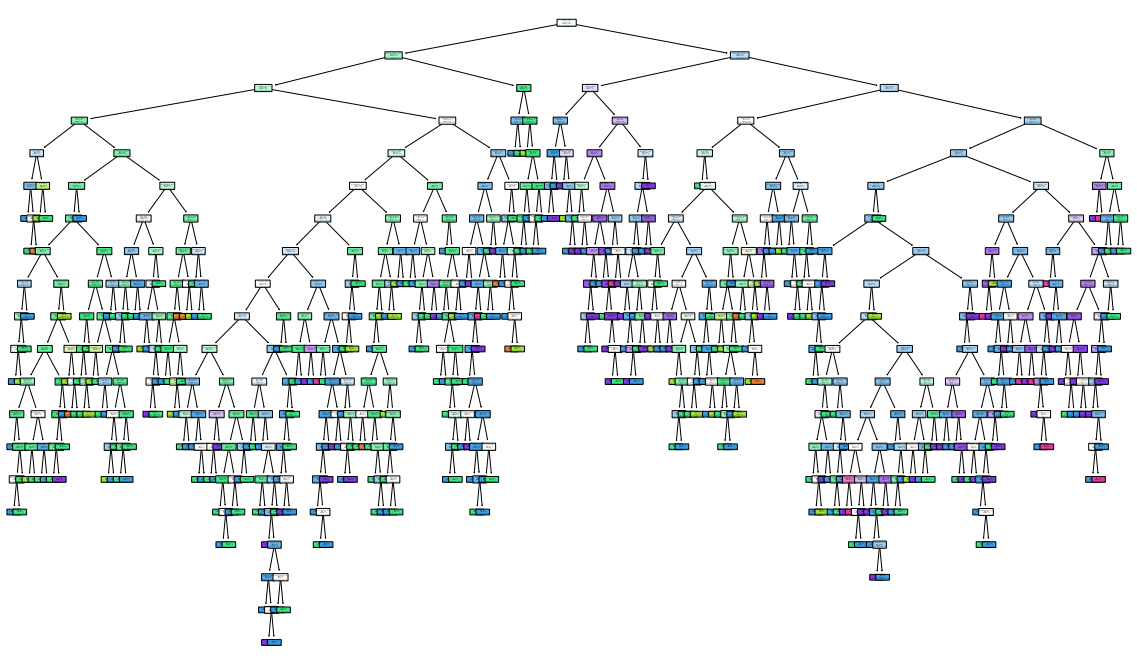

In [14]:
plt.figure(figsize=(20,12))
plot_tree(vinheira,filled=True,rounded=True,class_names=['3','4','5','6','7','8'],feature_names=vinhos_colunas)
plt.show()